# EDA and Feature Selection

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('RUL_Train_001.csv')
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [5]:
df.describe() # Generates descriptive statistics.

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
count,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [6]:
df.nunique(axis=0)  #Count distinct observations over requested axis.

Cycle               362
OpSet1              158
OpSet2               13
OpSet3                1
SensorMeasure1        1
SensorMeasure2      310
SensorMeasure3     3012
SensorMeasure4     4051
SensorMeasure5        1
SensorMeasure6        2
SensorMeasure7      513
SensorMeasure8       53
SensorMeasure9     6403
SensorMeasure10       1
SensorMeasure11     159
SensorMeasure12     427
SensorMeasure13      56
SensorMeasure14    6078
SensorMeasure15    1918
SensorMeasure16       1
SensorMeasure17      13
SensorMeasure18       1
SensorMeasure19       1
SensorMeasure20     120
SensorMeasure21    4745
RUL                 362
dtype: int64

# Box Plot

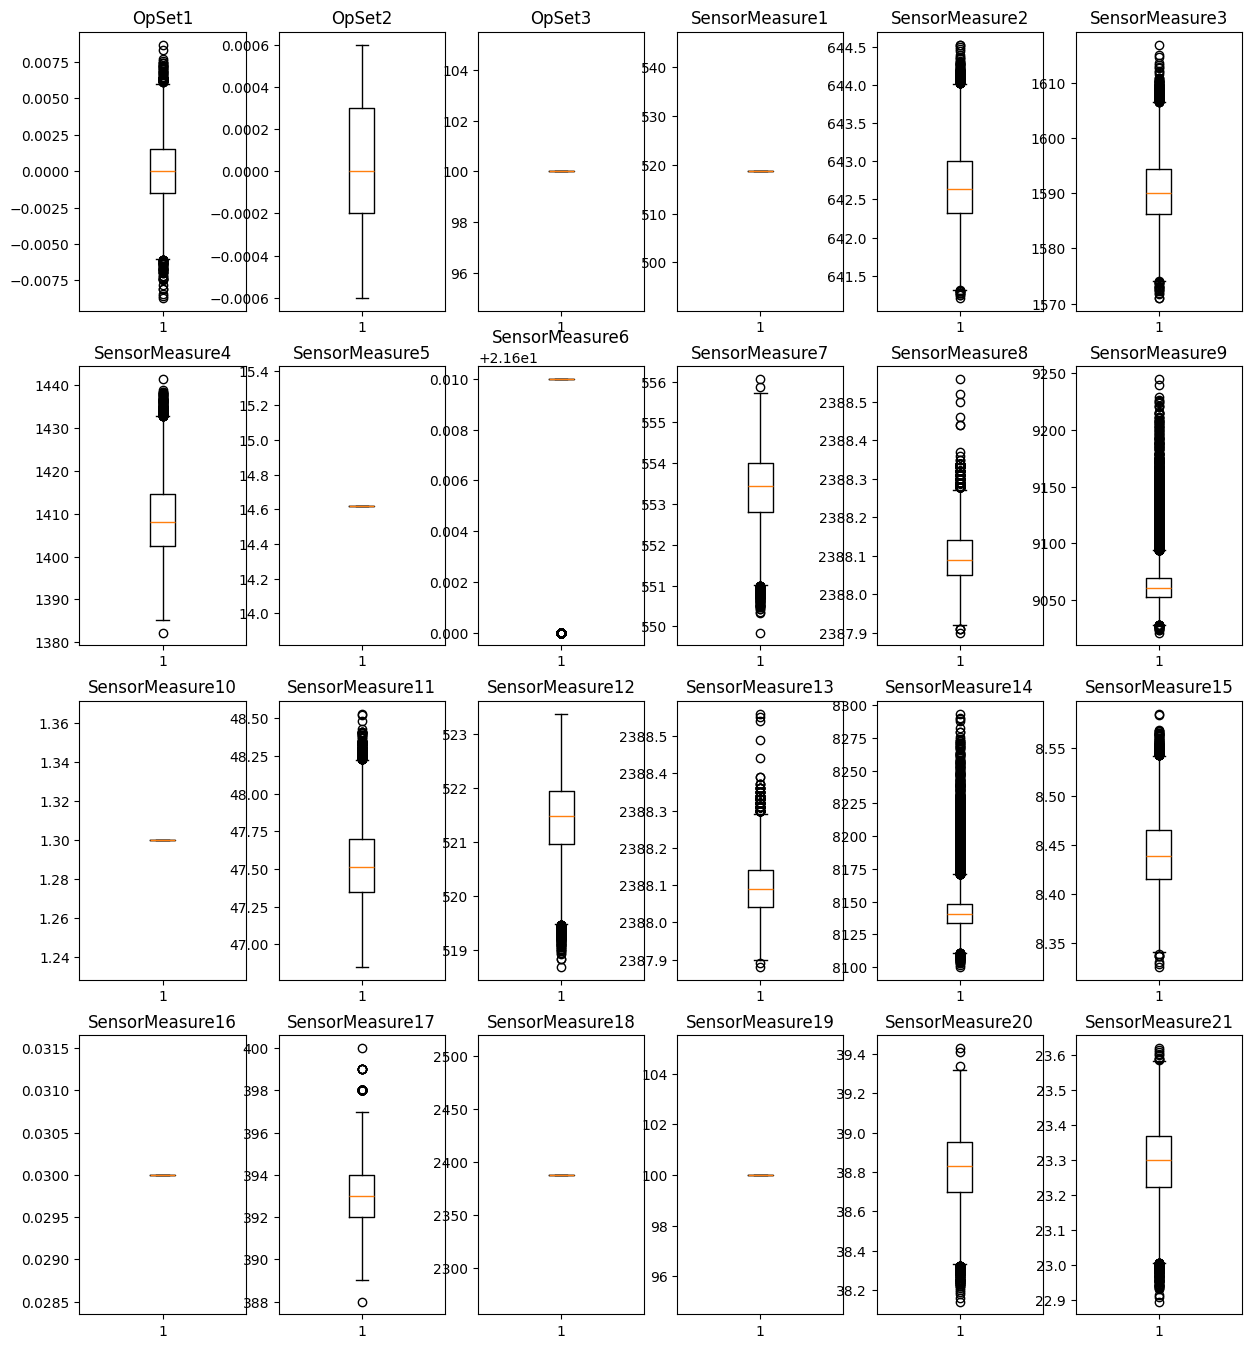

In [7]:
plt.figure(figsize = (15, 21))
for i in np.arange(1, 25):        # column 5 in python means actual 6th column
    temp = df.iloc[:, i]
    plt.subplot(5,6, i)
    plt.boxplot(temp)           # Make a box and whisker plot.
    plt.title(df.columns[i])
plt.show()

# Correlation Heat-map

[Text(0, 0.5, 'Cycle'),
 Text(0, 1.5, 'OpSet1'),
 Text(0, 2.5, 'OpSet2'),
 Text(0, 3.5, 'OpSet3'),
 Text(0, 4.5, 'SensorMeasure1'),
 Text(0, 5.5, 'SensorMeasure2'),
 Text(0, 6.5, 'SensorMeasure3'),
 Text(0, 7.5, 'SensorMeasure4'),
 Text(0, 8.5, 'SensorMeasure5'),
 Text(0, 9.5, 'SensorMeasure6'),
 Text(0, 10.5, 'SensorMeasure7'),
 Text(0, 11.5, 'SensorMeasure8'),
 Text(0, 12.5, 'SensorMeasure9'),
 Text(0, 13.5, 'SensorMeasure10'),
 Text(0, 14.5, 'SensorMeasure11'),
 Text(0, 15.5, 'SensorMeasure12'),
 Text(0, 16.5, 'SensorMeasure13'),
 Text(0, 17.5, 'SensorMeasure14'),
 Text(0, 18.5, 'SensorMeasure15'),
 Text(0, 19.5, 'SensorMeasure16'),
 Text(0, 20.5, 'SensorMeasure17'),
 Text(0, 21.5, 'SensorMeasure18'),
 Text(0, 22.5, 'SensorMeasure19'),
 Text(0, 23.5, 'SensorMeasure20'),
 Text(0, 24.5, 'SensorMeasure21'),
 Text(0, 25.5, 'RUL')]

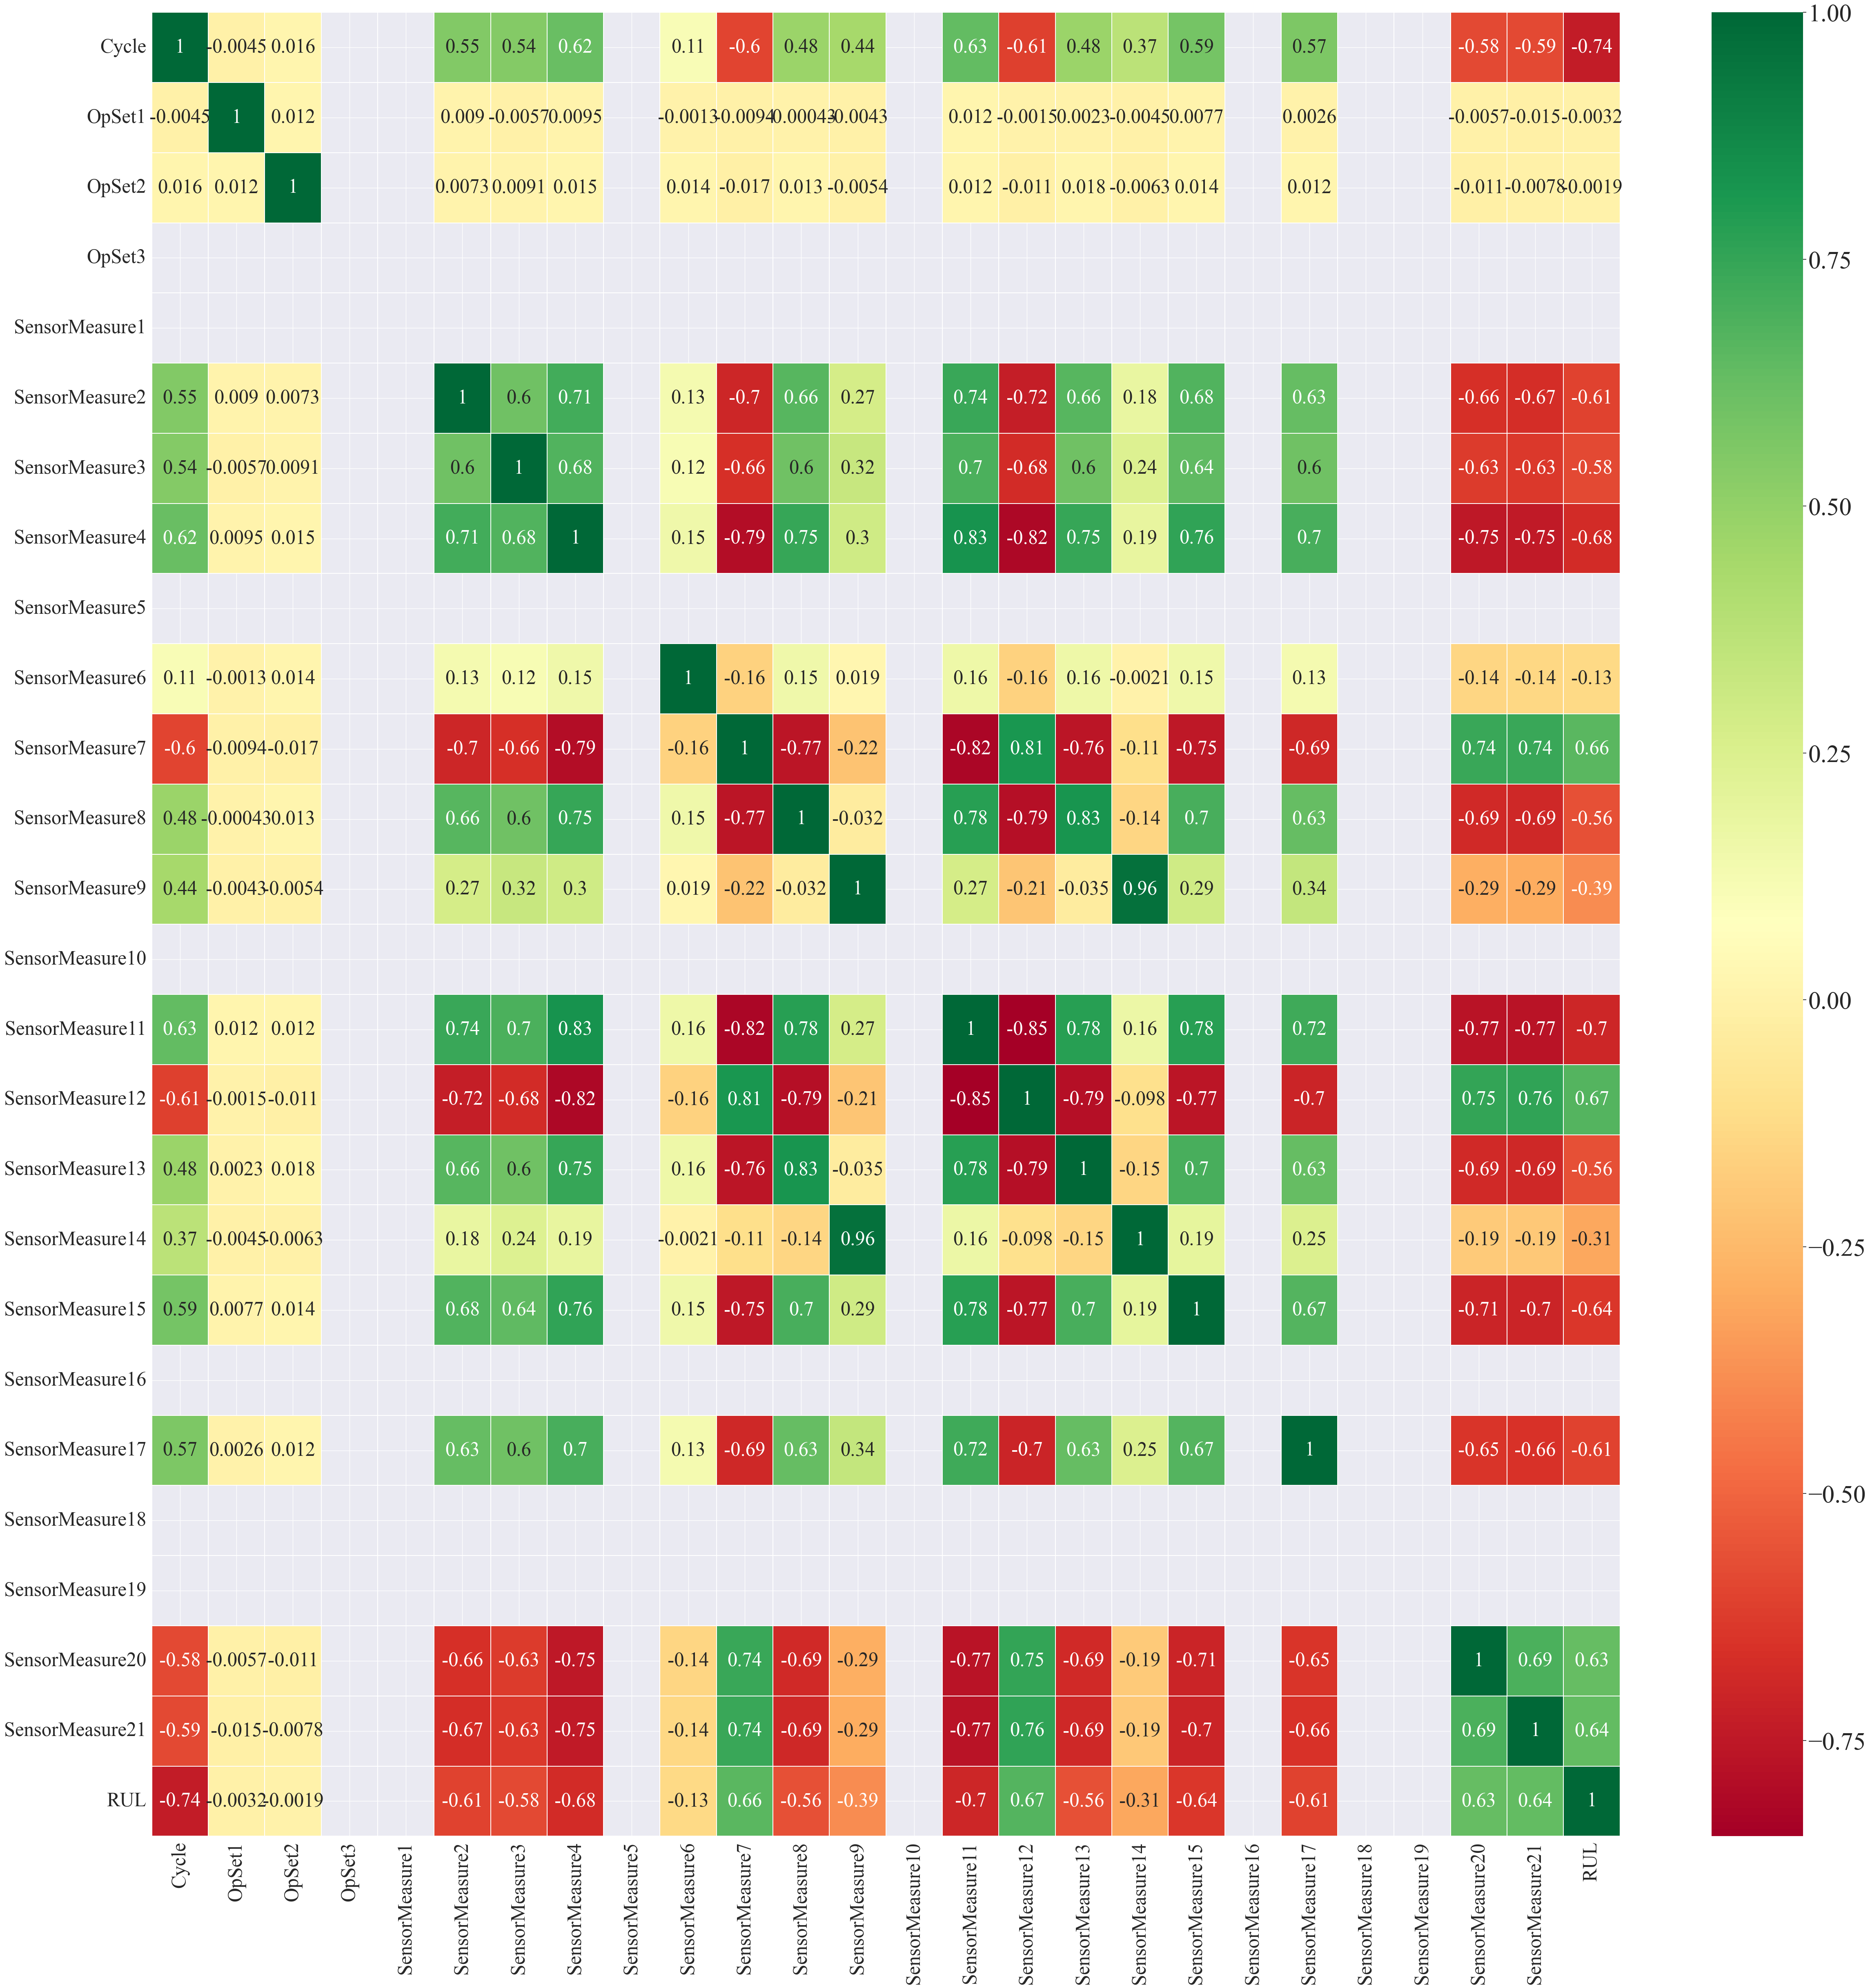

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
#plt.savefig('Corrplot.png',bbox_inches='tight')
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)

# Drop columns which have less than 0.5 correlation with RUL

In [9]:

delete_columns=[]

for col in df.columns:
    corr = df[col].corr(df['RUL'])
    #print(col,corr)
    if abs(corr)>0.5:
        pass
    else:    
        delete_columns.append(col)
        
delete_columns

c:\Users\izhan\anaconda3\envs\rul_env\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\izhan\anaconda3\envs\rul_env\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [10]:
new_df = df.drop(columns=delete_columns)
new_df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


[Text(0, 0.5, 'Cycle'),
 Text(0, 1.5, 'SensorMeasure2'),
 Text(0, 2.5, 'SensorMeasure3'),
 Text(0, 3.5, 'SensorMeasure4'),
 Text(0, 4.5, 'SensorMeasure7'),
 Text(0, 5.5, 'SensorMeasure8'),
 Text(0, 6.5, 'SensorMeasure11'),
 Text(0, 7.5, 'SensorMeasure12'),
 Text(0, 8.5, 'SensorMeasure13'),
 Text(0, 9.5, 'SensorMeasure15'),
 Text(0, 10.5, 'SensorMeasure17'),
 Text(0, 11.5, 'SensorMeasure20'),
 Text(0, 12.5, 'SensorMeasure21'),
 Text(0, 13.5, 'RUL')]

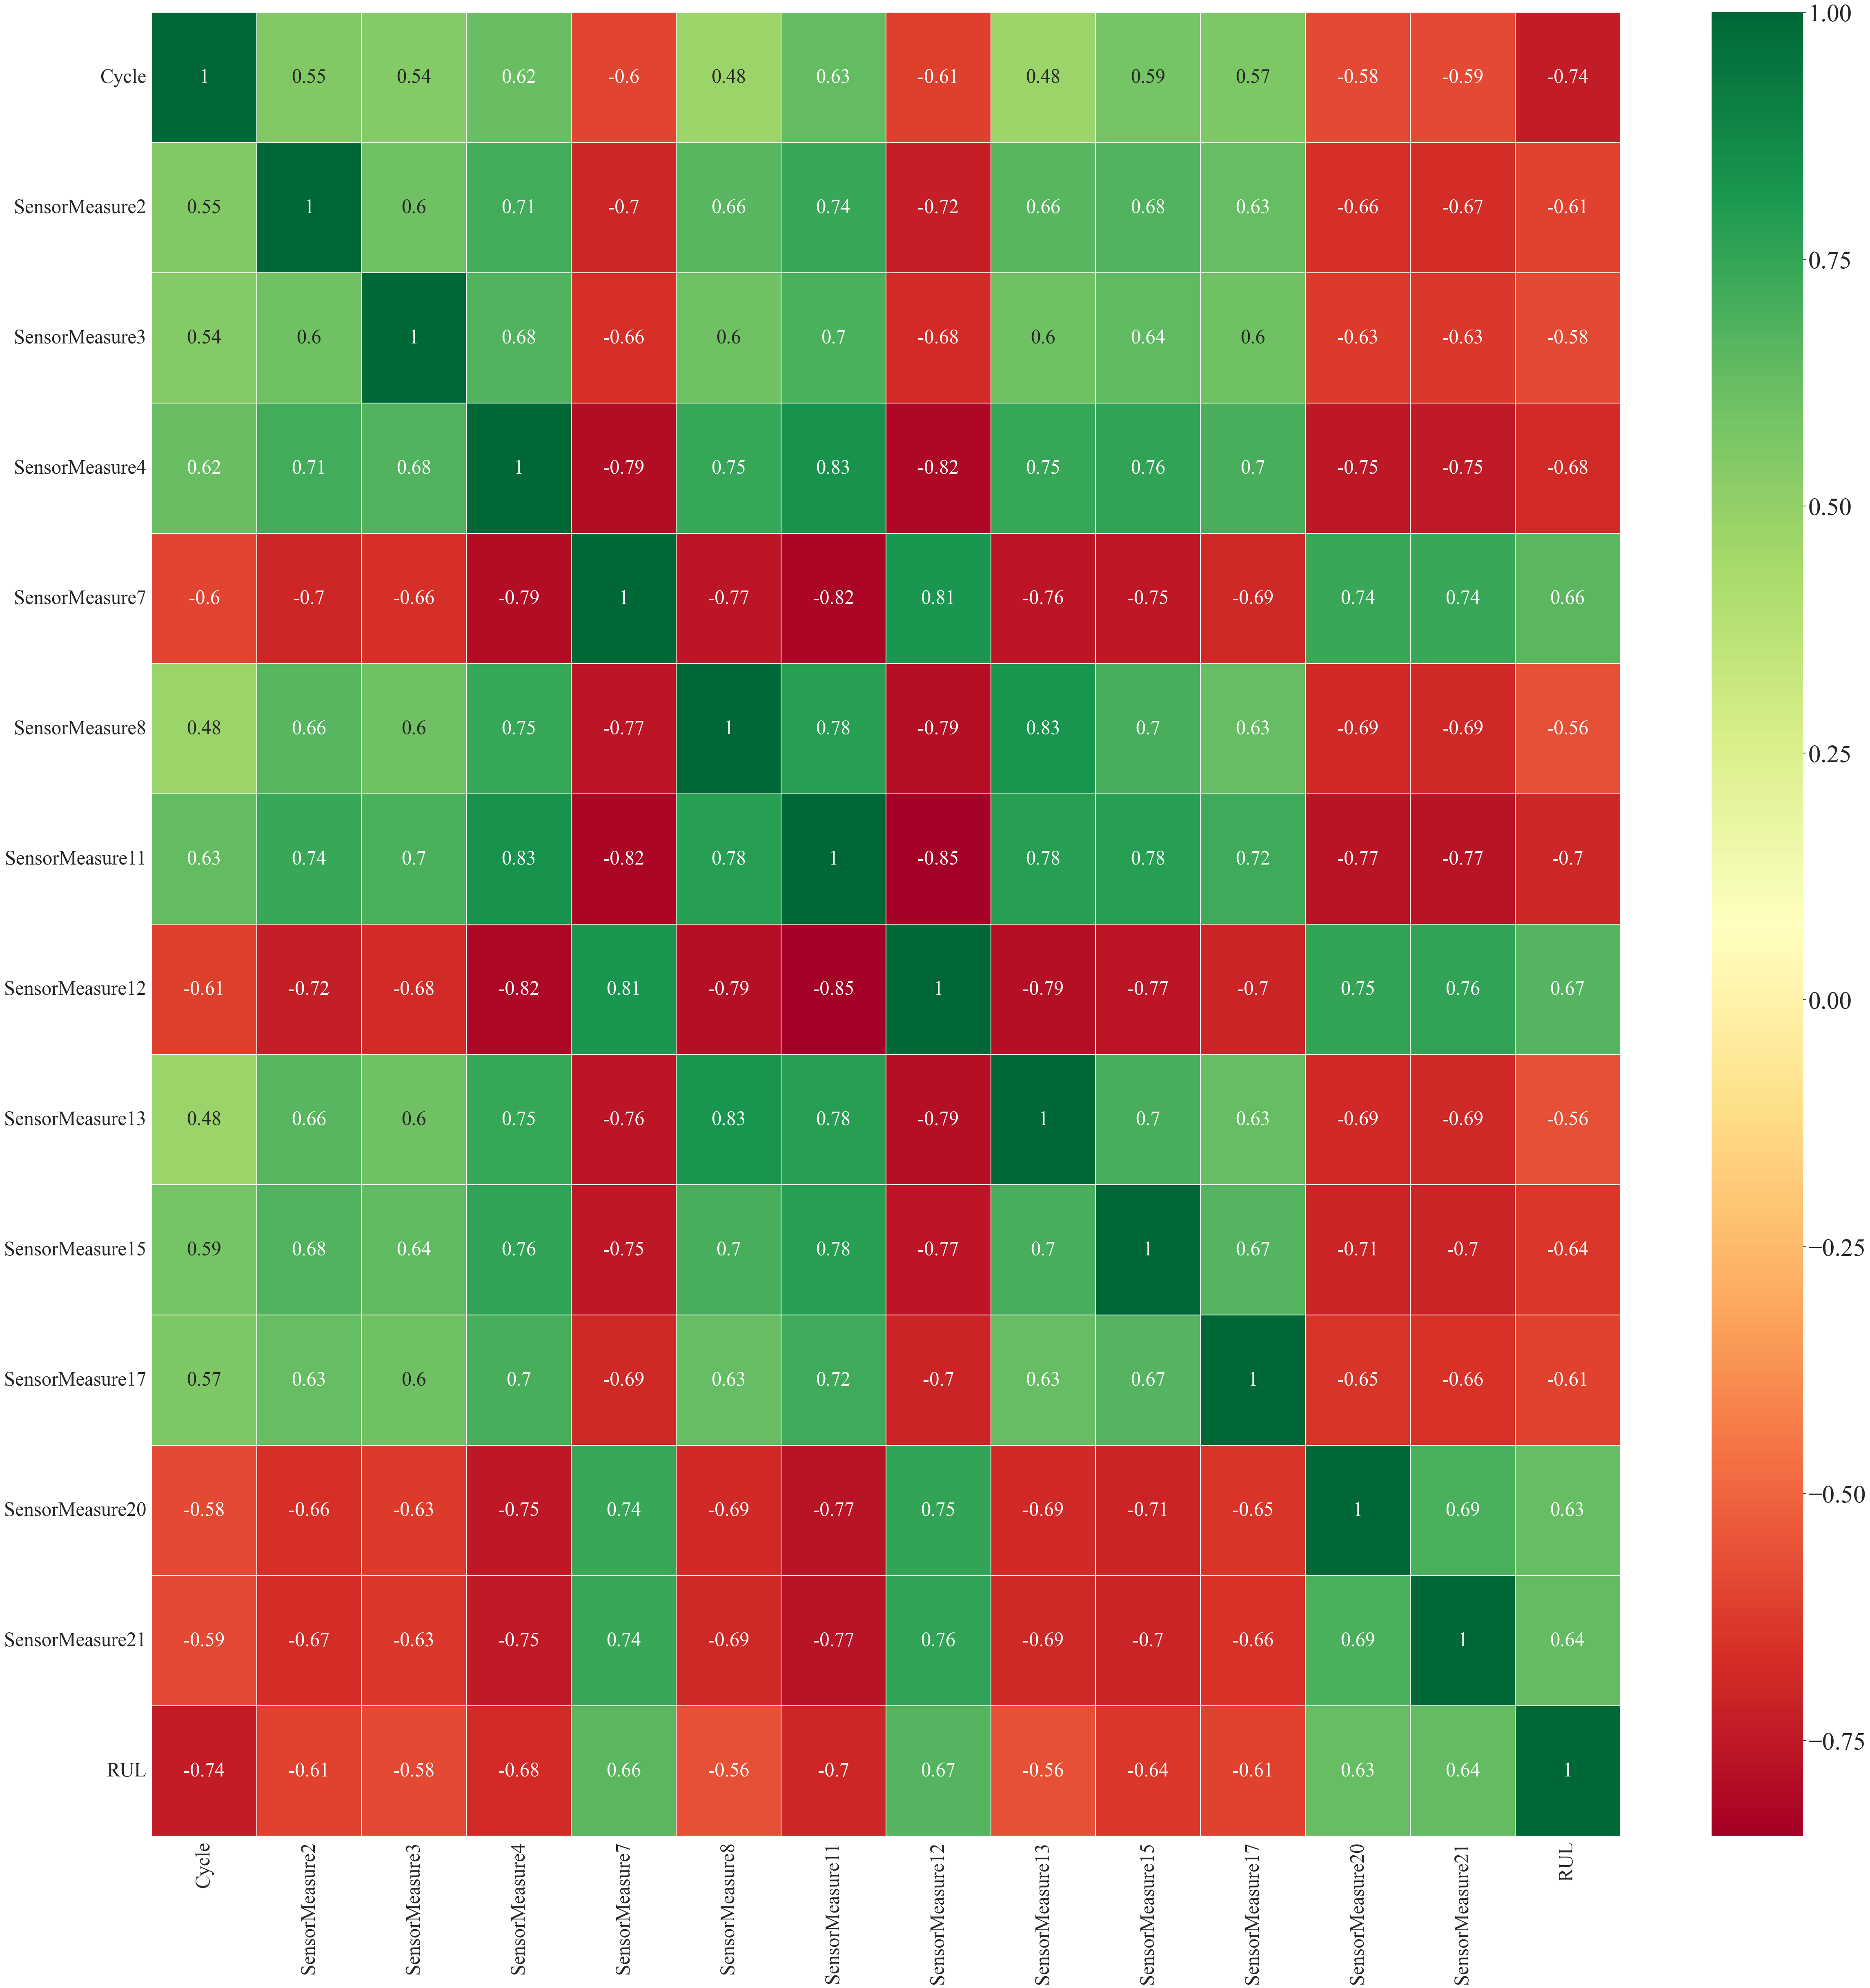

In [11]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)


# Extra Tree Regession for Feature Importance

In [12]:
X = new_df.iloc[:, 0:13]
y = new_df.iloc[:, 13]


from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.34548522 0.04287953 0.02599033 0.09773645 0.06336099 0.02665769
 0.12734997 0.0802181  0.02526395 0.05647211 0.03433118 0.03103375
 0.04322073]


<Axes: >

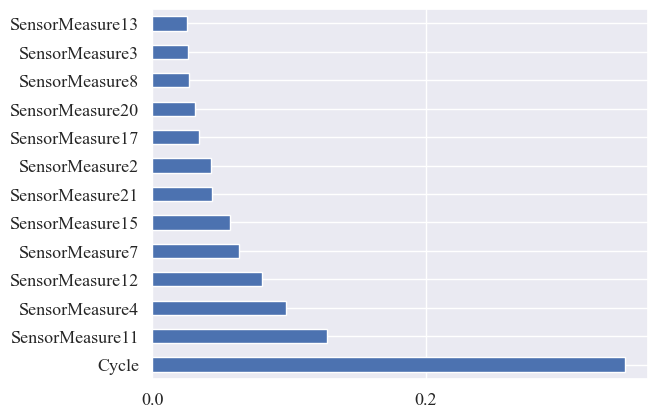

In [13]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances=feat_importances.sort_values( ascending=False)
feat_importances.nlargest(13).plot(kind='barh',fontsize =13)

In [14]:
X = new_df.iloc[:, 0:-1]
y = new_df.iloc[:, 13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

RMSE on Test set: 50.75696763818343
RMSE on Training set: 12.654189246632052


# Forward Feature Selection

In [15]:
feat_importances.keys()

Index(['Cycle', 'SensorMeasure11', 'SensorMeasure4', 'SensorMeasure12',
       'SensorMeasure7', 'SensorMeasure15', 'SensorMeasure21',
       'SensorMeasure2', 'SensorMeasure17', 'SensorMeasure20',
       'SensorMeasure8', 'SensorMeasure3', 'SensorMeasure13'],
      dtype='object')

In [16]:
feat_imp_df=new_df[['Cycle', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure4',
       'SensorMeasure7', 'SensorMeasure15', 'SensorMeasure21',
       'SensorMeasure20', 'SensorMeasure2', 'SensorMeasure17',
       'SensorMeasure3', 'SensorMeasure13', 'SensorMeasure8']]

In [17]:
feat_imp_df

,Cycle,SensorMeasure11,SensorMeasure12,SensorMeasure4,SensorMeasure7,SensorMeasure15,SensorMeasure21,SensorMeasure20,SensorMeasure2,SensorMeasure17,SensorMeasure3,SensorMeasure13,SensorMeasure8
0,1,47.47,521.66,1400.60,554.36,8.4195,23.4190,39.06,641.82,392,1589.70,2388.02,2388.06
1,2,47.49,522.28,1403.14,553.75,8.4318,23.4236,39.00,642.15,392,1591.82,2388.07,2388.04
2,3,47.27,522.42,1404.20,554.26,8.4178,23.3442,38.95,642.35,390,1587.99,2388.03,2388.08
3,4,47.13,522.86,1401.87,554.45,8.3682,23.3739,38.88,642.35,392,1582.79,2388.08,2388.11
4,5,47.28,522.19,1406.22,554.00,8.4294,23.4044,38.90,642.37,393,1582.85,2388.04,2388.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,48.07,519.49,1428.63,551.43,8.4956,22.9735,38.49,643.49,397,1597.98,2388.26,2388.19
20627,197,48.04,519.68,1433.58,550.86,8.5139,23.1594,38.30,643.54,395,1604.50,2388.22,2388.23
20628,198,48.09,520.01,1428.18,550.94,8.5646,22.9333,38.44,643.42,398,1602.46,2388.24,2388.24
20629,199,48.39,519.67,1426.53,550.68,8.5389,23.0640,38.29,643.23,395,1605.26,2388.23,2388.25


In [18]:
number_of_features=[]
test_rmse=[]
train_rmse =[]   


for i in range(1,13):
    
    number_of_features.append(i)
    
    X = feat_imp_df.iloc[:, 0:i]
    y = new_df.iloc[:, 13]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    
    print('Total Features used:',i)
    
    y_pred = regressor.predict(X_test)
    test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    y_pred_train = regressor.predict(X_train)
    train_rmse.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    
    print('\n')

Total Features used: 1
RMSE on Test set: 60.35970423889875
RMSE on Training set: 39.32958199233499


Total Features used: 2
RMSE on Test set: 55.932146593311394
RMSE on Training set: 23.50434779705606


Total Features used: 3
RMSE on Test set: 53.14828148151062
RMSE on Training set: 13.829739012383325


Total Features used: 4
RMSE on Test set: 51.99380054888587
RMSE on Training set: 13.226690817961266


Total Features used: 5
RMSE on Test set: 51.752118690687844
RMSE on Training set: 12.945733469721759


Total Features used: 6
RMSE on Test set: 51.21643990696148
RMSE on Training set: 12.814304684625382


Total Features used: 7
RMSE on Test set: 51.18375855068528
RMSE on Training set: 12.758628278405723


Total Features used: 8
RMSE on Test set: 51.221344932460426
RMSE on Training set: 12.713055230404818


Total Features used: 9
RMSE on Test set: 51.04695414875678
RMSE on Training set: 12.642124478527592


Total Features used: 10
RMSE on Test set: 51.05322786945481
RMSE on Training set:

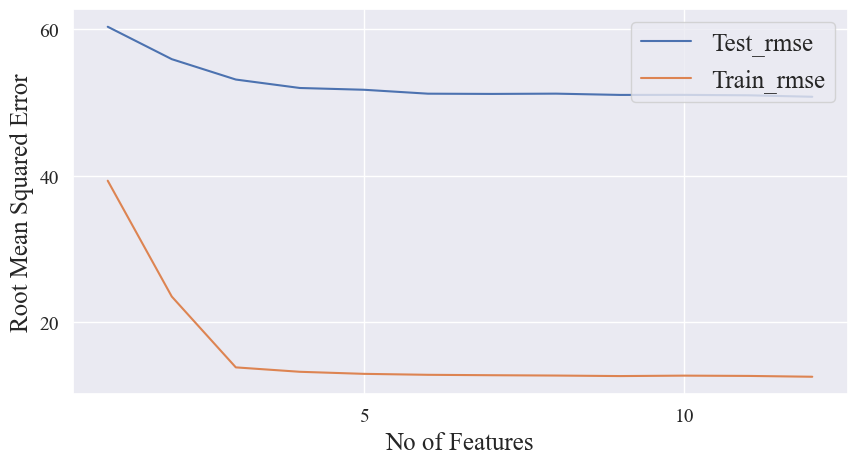

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(number_of_features,test_rmse,)
plt.plot(number_of_features,train_rmse)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("Root Mean Squared Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Test_rmse','Train_rmse'], loc='upper right',prop={'size': 18})
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [21]:
X = new_df.iloc[:, 0:-1]
y = new_df.iloc[:, 13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('MAE on Test set:', (metrics.mean_absolute_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('MAE on Training set:', (metrics.mean_absolute_error(y_train, y_pred_train)))

MAE on Test set: 37.07838623697601
MAE on Training set: 8.8603556713524


In [22]:
number_of_features=[]
test_mae=[]
train_mae =[]   


for i in range(1,13):
    
    number_of_features.append(i)
    
    X = feat_imp_df.iloc[:, 0:i]
    y = new_df.iloc[:, 13]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    
    print('Total Features used:',i)
    
    y_pred = regressor.predict(X_test)
    test_mae.append(metrics.mean_absolute_error(y_test, y_pred))
    print('MAE on Test set:', (metrics.mean_absolute_error(y_test, y_pred)))

    y_pred_train = regressor.predict(X_train)
    train_mae.append((metrics.mean_absolute_error(y_train, y_pred_train)))
    print('MAE on Training set:', (metrics.mean_absolute_error(y_train, y_pred_train)))
    
    print('\n')

Total Features used: 1
MAE on Test set: 46.59724490991951
MAE on Training set: 29.060143557076376


Total Features used: 2
MAE on Test set: 41.97809792184634
MAE on Training set: 16.11262511683125


Total Features used: 3
MAE on Test set: 39.80492026088361
MAE on Training set: 9.773560962614162


Total Features used: 4
MAE on Test set: 38.55328325660286
MAE on Training set: 9.350368395540475


Total Features used: 5
MAE on Test set: 38.02156530167192
MAE on Training set: 9.186251211827436


Total Features used: 6
MAE on Test set: 37.770671189726194
MAE on Training set: 9.060894934561318


Total Features used: 7
MAE on Test set: 37.55213229949116
MAE on Training set: 9.009117183713037


Total Features used: 8
MAE on Test set: 37.434802519990306
MAE on Training set: 8.967858095007273


Total Features used: 9
MAE on Test set: 37.309258541313305
MAE on Training set: 8.897527266117306


Total Features used: 10
MAE on Test set: 37.24862127453356
MAE on Training set: 8.901217886572951


Total

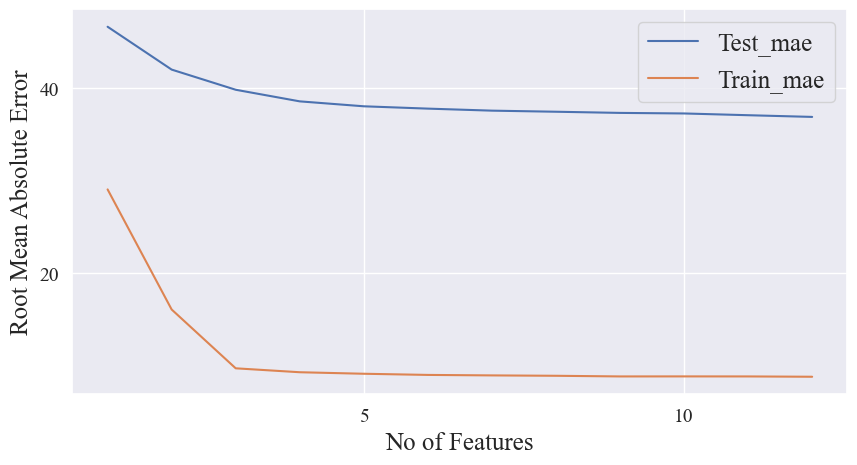

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(number_of_features,test_mae,)
plt.plot(number_of_features,train_mae)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("Mean Absolute Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Test_mae','Train_mae'], loc='upper right',prop={'size': 18})
plt.show()

In [24]:
X = new_df.iloc[:, 0:-1]
y = new_df.iloc[:, 13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('MedAE on Test set:', (metrics.median_absolute_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('MedAE on Training set:', (metrics.median_absolute_error(y_train, y_pred_train)))

MedAE on Test set: 24.270000000000003
MedAE on Training set: 6.290000000000003


In [ ]:
no_of_features=[]
test_medae=[]
train_medae =[]   


for i in range(1,13):
    
    no_of_features.append(i)
    
    X = feat_imp_df.iloc[:, 0:i]
    y = new_df.iloc[:, 13]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    
    print('Total Features used:',i)
    
    y_pred = regressor.predict(X_test)
    test_medae.append(metrics.median_absolute_error(y_test, y_pred))
    print('MedAE on Test set:', (metrics.median_absolute_error(y_test, y_pred)))

    y_pred_train = regressor.predict(X_train)
    train_medae.append((metrics.median_absolute_error(y_train, y_pred_train)))
    print('MedAE on Training set:', (metrics.median_absolute_error(y_train, y_pred_train)))
    
    print('\n')

Total Features used: 1
MedAE on Test set: 45.83291559344255
MedAE on Training set: 22.775261401228022


Total Features used: 2
MedAE on Test set: 31.263333333333332
MedAE on Training set: 10.75889880952382


Total Features used: 3
MedAE on Test set: 29.28
MedAE on Training set: 6.9199999999999875


Total Features used: 4
MedAE on Test set: 27.569999999999993
MedAE on Training set: 6.6100000000000065


Total Features used: 5
MedAE on Test set: 27.289999999999992
MedAE on Training set: 6.569999999999997


Total Features used: 6
MedAE on Test set: 27.159999999999997
MedAE on Training set: 6.490000000000009


Total Features used: 7
MedAE on Test set: 26.039999999999992
MedAE on Training set: 6.350000000000001


Total Features used: 8
MedAE on Test set: 25.97
MedAE on Training set: 6.420000000000002


Total Features used: 9
MedAE on Test set: 26.0
MedAE on Training set: 6.330000000000005


Total Features used: 10
MedAE on Test set: 25.49000000000001
MedAE on Training set: 6.310000000000002


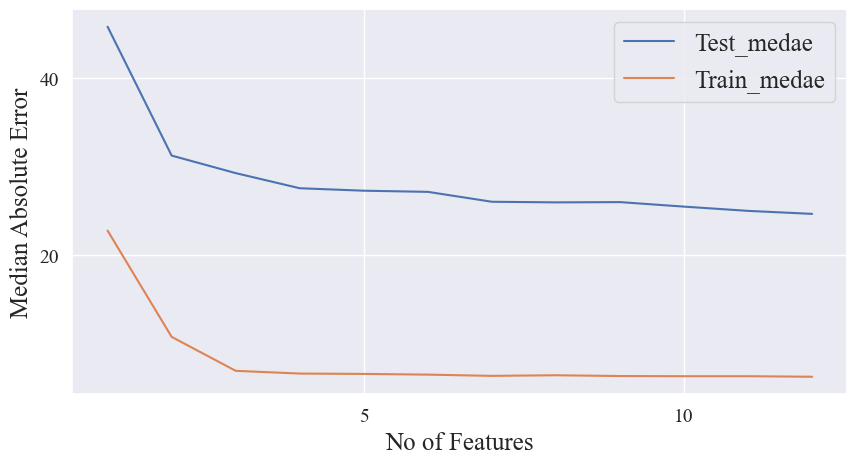

In [27]:
plt.figure(figsize = (10, 5))
plt.plot(no_of_features,test_medae,)
plt.plot(no_of_features,train_medae)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("Median Absolute Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Test_medae','Train_medae'], loc='upper right',prop={'size': 18})
plt.show()

In [28]:
X = new_df.iloc[:, 0:-1]
y = new_df.iloc[:, 13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('R_2 on Test set:', (metrics.r2_score(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('R_2 on Training set:', (metrics.r2_score(y_train, y_pred_train)))

R_2 on Test set: 0.5847396904285884
R_2 on Training set: 0.9633962046427178


In [29]:
No_of_features=[]
test_r2=[]
train_r2 =[]   


for i in range(1,13):
    
    No_of_features.append(i)
    
    X = feat_imp_df.iloc[:, 0:i]
    y = new_df.iloc[:, 13]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    
    print('Total Features used:',i)
    
    y_pred = regressor.predict(X_test)
    test_r2.append(metrics.r2_score(y_test, y_pred))
    print('R_2 on Test set:', (metrics.r2_score(y_test, y_pred)))

    y_pred_train = regressor.predict(X_train)
    train_r2.append((metrics.r2_score(y_train, y_pred_train)))
    print('R_2 on Training set:', (metrics.r2_score(y_train, y_pred_train)))
    
    print('\n')

Total Features used: 1
R_2 on Test set: 0.4114809736387922
R_2 on Training set: 0.6441643465630755


Total Features used: 2
R_2 on Test set: 0.4953265019773515
R_2 on Training set: 0.8730573908062251


Total Features used: 3
R_2 on Test set: 0.5440100072865076
R_2 on Training set: 0.9559591336658866


Total Features used: 4
R_2 on Test set: 0.5608530813767361
R_2 on Training set: 0.9597201436711846


Total Features used: 5
R_2 on Test set: 0.5711724724053996
R_2 on Training set: 0.960959778742979


Total Features used: 6
R_2 on Test set: 0.5728692889683232
R_2 on Training set: 0.9615936202583331


Total Features used: 7
R_2 on Test set: 0.5757781286247889
R_2 on Training set: 0.9620366781481495


Total Features used: 8
R_2 on Test set: 0.5756101162418361
R_2 on Training set: 0.9627000564124601


Total Features used: 9
R_2 on Test set: 0.5788157193918488
R_2 on Training set: 0.9628832334810922


Total Features used: 10
R_2 on Test set: 0.5810440903379616
R_2 on Training set: 0.963085944

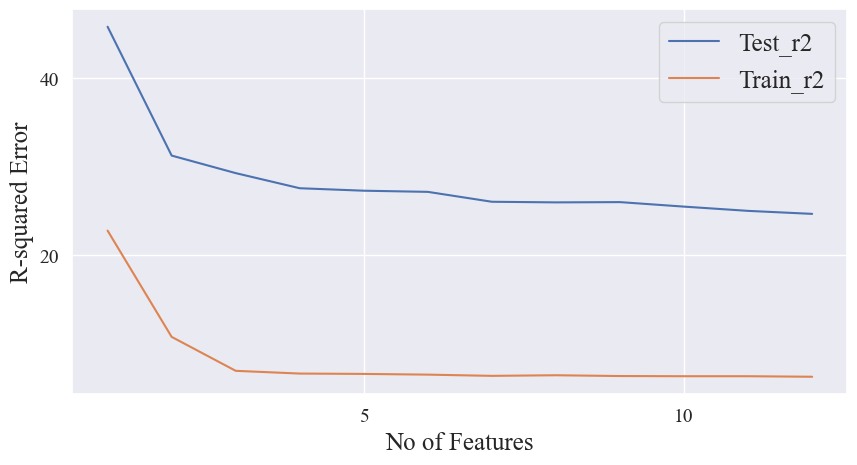

In [30]:
plt.figure(figsize = (10, 5))
plt.plot(No_of_features,test_medae,)
plt.plot(No_of_features,train_medae)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("R-squared Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Test_r2','Train_r2'], loc='upper right',prop={'size': 18})
plt.show()